In [1]:
!ls

2022-01-06_04-33_logs  Untitled1.ipynb	residualmlp  task_trigger.py
Untitled.ipynb	       demo-01.tar.gz	task.py


In [2]:
!pip3 install pandas

     |████████████████████████████████| 11.5 MB 26.0 MB/s eta 0:00:01    |█████▎                          | 1.9 MB 26.0 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [3]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from residualmlp.residual_mlp import make_model

In [4]:

# Read the data.
df = pd.read_csv("https://storage.googleapis.com/ml_universities/california_housing_train.csv", sep=",")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [28]:
# In a use-worthy model, we would bucketize and cross the lattitude and longitude.
# and probably bucketize several of the continuous variables
# Here we are just doing a simple example to demo how to work our API

In [6]:
msk = np.random.rand(len(df)) < 0.8
traindf = df[msk]
evaldf = df[~msk]
traindf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [7]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13649 entries, 0 to 16998
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13649 non-null  float64
 1   latitude            13649 non-null  float64
 2   housing_median_age  13649 non-null  float64
 3   total_rooms         13649 non-null  float64
 4   total_bedrooms      13649 non-null  float64
 5   population          13649 non-null  float64
 6   households          13649 non-null  float64
 7   median_income       13649 non-null  float64
 8   median_house_value  13649 non-null  float64
dtypes: float64(9)
memory usage: 1.0 MB


In [8]:
y_train = traindf.pop('median_house_value')

In [9]:
y_train = y_train.to_numpy()

In [10]:
y_eval = evaldf.pop('median_house_value')

In [11]:
y_eval = y_eval.to_numpy()

In [12]:
x_train = traindf.to_numpy()

In [13]:
x_eval = evaldf.to_numpy()

In [17]:
LEARNING_RATE = 0.007
INPUT_SHAPE = 8
BASE_MODEL = ''
BASE_MODEL_INPUT_SHAPE = None
FLATTEN = False
BLOCKS = [[4,12,2],[4,12,2]]
RESIDUAL_BYPASS_DENSE_LAYERS = [[3],[3]]
B_NORM_OR_DROPOUT_RESIDUAL_BYPASS_LAYERS = 'bnorm'
DROPOUT_RATE_FOR_BYPASS_LAYERS = 0.0
B_NORM_OR_DROPOUT_LAST_LAYERS = 'bnorm'
DROPOUT_RATE = 0.0
FINAL_DENSE_LAYERS = [4,4]
NUMBER_OF_CLASSES = 1
FINAL_ACTIVATION = None
LOSS = tf.keras.losses.MeanSquaredError()


In [25]:
model3=\
    make_model(learning_rate=LEARNING_RATE,
                input_shape = INPUT_SHAPE,  
                base_model= BASE_MODEL,
                base_model_input_shape = BASE_MODEL_INPUT_SHAPE,
                flatten_after_base_model = FLATTEN,
                blocks = BLOCKS,
                residual_bypass_dense_layers = RESIDUAL_BYPASS_DENSE_LAYERS,
                b_norm_or_dropout_residual_bypass_layers=B_NORM_OR_DROPOUT_RESIDUAL_BYPASS_LAYERS,
                dropout_rate_for_bypass_layers=DROPOUT_RATE_FOR_BYPASS_LAYERS,
                b_norm_or_dropout_last_layers=B_NORM_OR_DROPOUT_LAST_LAYERS,
                dropout_rate=DROPOUT_RATE,
                final_dense_layers =\
                    FINAL_DENSE_LAYERS,
                number_of_classes = NUMBER_OF_CLASSES,
                final_activation = FINAL_ACTIVATION,
               loss = LOSS
              )

In [26]:
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_34 (Dense)                (None, 12)           108         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_36 (BatchNo (None, 12)           48          dense_34[0][0]                   
__________________________________________________________________________________________________
dense_36 (Dense)                (None, 12)           156         batch_normalization_36[0][0]     
____________________________________________________________________________________________

In [20]:
BATCH_SIZE = 50
EPOCHS = 100
PATIENCE = 15
PATIENCE_MIN_DELTA = .005

In [21]:
logdir = os.path.join("2022-01-06_04-33_logs", 'results')
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, 
                                                      histogram_freq=1)

2022-01-06 10:26:15.148968: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-01-06 10:26:15.149027: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-01-06 10:26:15.151892: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [27]:
history = model3.fit(x=x_train,  
                    y=y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS,      
                    verbose='auto', 
                    callbacks=[tf.keras.callbacks.\
                               EarlyStopping(monitor='val_loss',
                                             patience=PATIENCE,
                                             min_delta=PATIENCE_MIN_DELTA,
                                             restore_best_weights=True),
                            tensorboard_callback], 
                    validation_split=0.3, 
                    validation_data=None, 
                    shuffle=True,
                    class_weight=None, 
                    sample_weight=None, 
                    initial_epoch=0, 
                    steps_per_epoch=None, 
                    validation_steps=None, 
                    validation_batch_size=10, 
                    validation_freq=1, 
                    max_queue_size=10, 
                    workers=5, 
                    use_multiprocessing=True)

2022-01-06 10:27:48.415773: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
  2/192 [..............................] - ETA: 1:13 - loss: 37828841472.0000 - root_mean_squared_error: 194496.3906 

2022-01-06 10:27:59.809181: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-01-06 10:27:59.809382: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-01-06 10:27:59.826299: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-06 10:27:59.893842: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-01-06 10:27:59.924232: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: 2022-01-06_04-33_logs/results/train/plugins/profile/2022_01_06_10_27_59

2022-01-06 10:27:59.932526: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to 2022-01-06_04-33_logs/results/train/plugins/profile/2022_01_06_10_27_59/nfjaz7k0o5.trace.json.gz
2022-01-06 10:27:59.999484: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: 2022-01-06_04-33_logs/results

192/192 [==============================] - 18s 37ms/step - loss: 51904733184.0000 - root_mean_squared_error: 227826.1094 - val_loss: 66678595584.0000 - val_root_mean_squared_error: 258221.9844
Epoch 2/100
192/192 [==============================] - 7s 34ms/step - loss: 51894935552.0000 - root_mean_squared_error: 227804.5938 - val_loss: 66661441536.0000 - val_root_mean_squared_error: 258188.7656
Epoch 3/100
192/192 [==============================] - 5s 28ms/step - loss: 51876548608.0000 - root_mean_squared_error: 227764.2344 - val_loss: 66609852416.0000 - val_root_mean_squared_error: 258088.8438
Epoch 4/100
192/192 [==============================] - 7s 34ms/step - loss: 51850067968.0000 - root_mean_squared_error: 227706.0938 - val_loss: 66616147968.0000 - val_root_mean_squared_error: 258101.0312
Epoch 5/100
192/192 [==============================] - 5s 28ms/step - loss: 51814191104.0000 - root_mean_squared_error: 227627.3125 - val_loss: 66566897664.0000 - val_root_mean_squared_error: 258

In [28]:
hy = pd.DataFrame(history.history)

<AxesSubplot:>

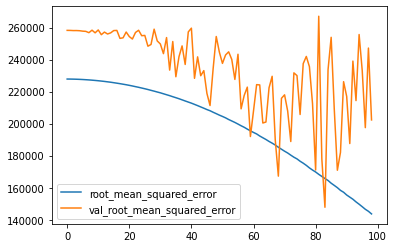

In [33]:
import matplotlib.pyplot as plt
hy[['root_mean_squared_error','val_root_mean_squared_error']].plot()

In [ ]:
# Not a great run (Not the optimal neural network architecture configuration, nor the ideal hyperparameters, nor is the right pre-processing in place, but it is a temporary demo to shows an example of the API's use.